In [7]:
from sklearn.decomposition import PCA
from sklearn import datasets

# Wczytaj przykładowy zbiór danych - dane dotyczące trzech gatunków Irysów
iris = datasets.load_iris()

# Podzielmy zbiór na cechy oraz etykiety
# Zostawiamy tym razem wszystkie cechy - będziemy próbować odgadnąć które cechy są najważniejsze
X = iris.data
y = iris.target

# Inicjalizacja. Można od razu wypełnić n_components, na razie wykorzystujemy wszystkie cechy 
# pca = PCA(n_components=3)

pca = PCA()
pca.fit(X)

print(pca.n_components_)
pca_limit = PCA(n_components = 1)

X_new = pca_limit.fit_transform(X)

print(pca.components_)
print(pca.explained_variance_ratio_)


4
[[ 0.36138659 -0.08452251  0.85667061  0.3582892 ]
 [ 0.65658877  0.73016143 -0.17337266 -0.07548102]
 [-0.58202985  0.59791083  0.07623608  0.54583143]
 [-0.31548719  0.3197231   0.47983899 -0.75365743]]
[0.92461872 0.05306648 0.01710261 0.00521218]


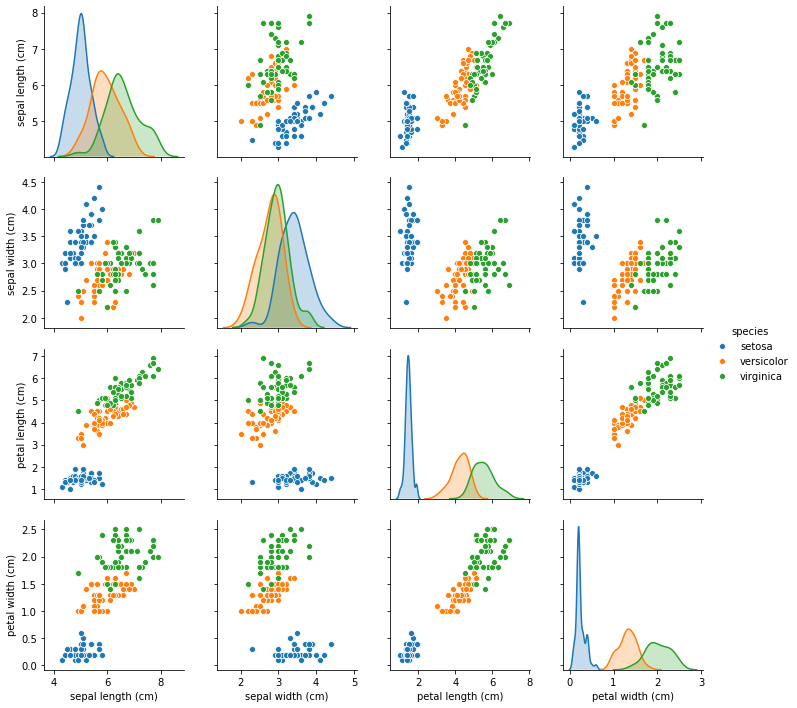

In [2]:
# Jedna cecha tłumaczy prawie wszystko? Sprawdźmy!

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
%matplotlib inline

# wykresy będą tworzone przy pomocy pakietu seaborn
import seaborn as sns

# konwersja na obiekt pandas.DataFrame
iris_df = pd.DataFrame(iris['data'], columns=iris['feature_names'])

# funkcja która nam zamieni wartości 0, 1, 2 na pełny opis tekstowy dla gatunku
targets = map(lambda x: iris['target_names'][x], iris['target'] )

# doklejenie informacji o gatunku do reszty dataframe
iris_df['species'] = np.array(list(targets))

# wykres
sns.pairplot(iris_df, hue='species')
plt.show()

In [8]:
pca_limit = PCA(n_components = 1)

X_new = pca_limit.fit_transform(X)

print(pca_limit.n_components_)
print(pca_limit.components_)
print(pca_limit.explained_variance_ratio_)

1
[[ 0.36138659 -0.08452251  0.85667061  0.3582892 ]]
[0.92461872]


In [4]:
# Po użyciu funkcji transform (lub fit_transform) dekompozycja pozostawiła nam tylko liczbę cech, którą skonfigurowaliśmy
# Dodatkowo została od nich odjęta średnia, więc dane zawierają tylko wariancję

X_new[:5]

array([[-2.68412563],
       [-2.71414169],
       [-2.88899057],
       [-2.74534286],
       [-2.72871654]])

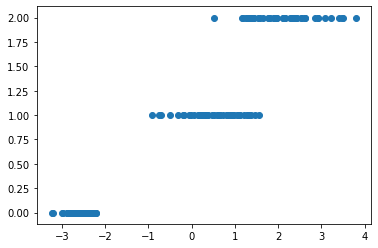

In [5]:
plt.scatter(X_new, y)
plt.show()

Ilośc komponentów:  7
Zaartość nowych cech:
[[-7.59591338e-03  1.37949216e-03  1.14336793e-01  3.89661227e-02
   9.92645736e-01 -1.33913413e-03 -1.33690002e-03]
 [-1.75769284e-02  9.60936514e-03  9.45589761e-01  2.98345419e-01
  -1.20856362e-01 -3.56235050e-02 -2.39464426e-02]
 [-4.18640597e-02 -1.01484086e-02 -3.03968187e-01  9.47754691e-01
  -2.65786747e-03 -7.45838072e-02 -4.40339423e-02]
 [ 8.30210719e-01 -1.18854684e-02  8.95401658e-03  6.19646689e-02
   3.59602211e-03 -3.97117397e-02  5.52357810e-01]
 [ 5.50820159e-01 -2.51484148e-02 -2.79640496e-03 -9.86402779e-04
   3.74762198e-03  1.74593181e-01 -8.15756761e-01]
 [-6.84706630e-02 -3.66980844e-03  1.23408167e-02  8.56293969e-02
  -3.75890547e-03  9.80334696e-01  1.63533991e-01]
 [ 2.32343898e-02  9.99507675e-01 -1.22536842e-02  7.72725877e-03
  -1.11829585e-04  7.10714831e-03 -1.35714213e-02]]
[9.97537026e-01 2.06319277e-03 3.56333024e-04 3.17081838e-05
 7.59336553e-06 3.86726761e-06 2.79566495e-07]


C:\Users\rafal.bieganski\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\rafal.bieganski\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


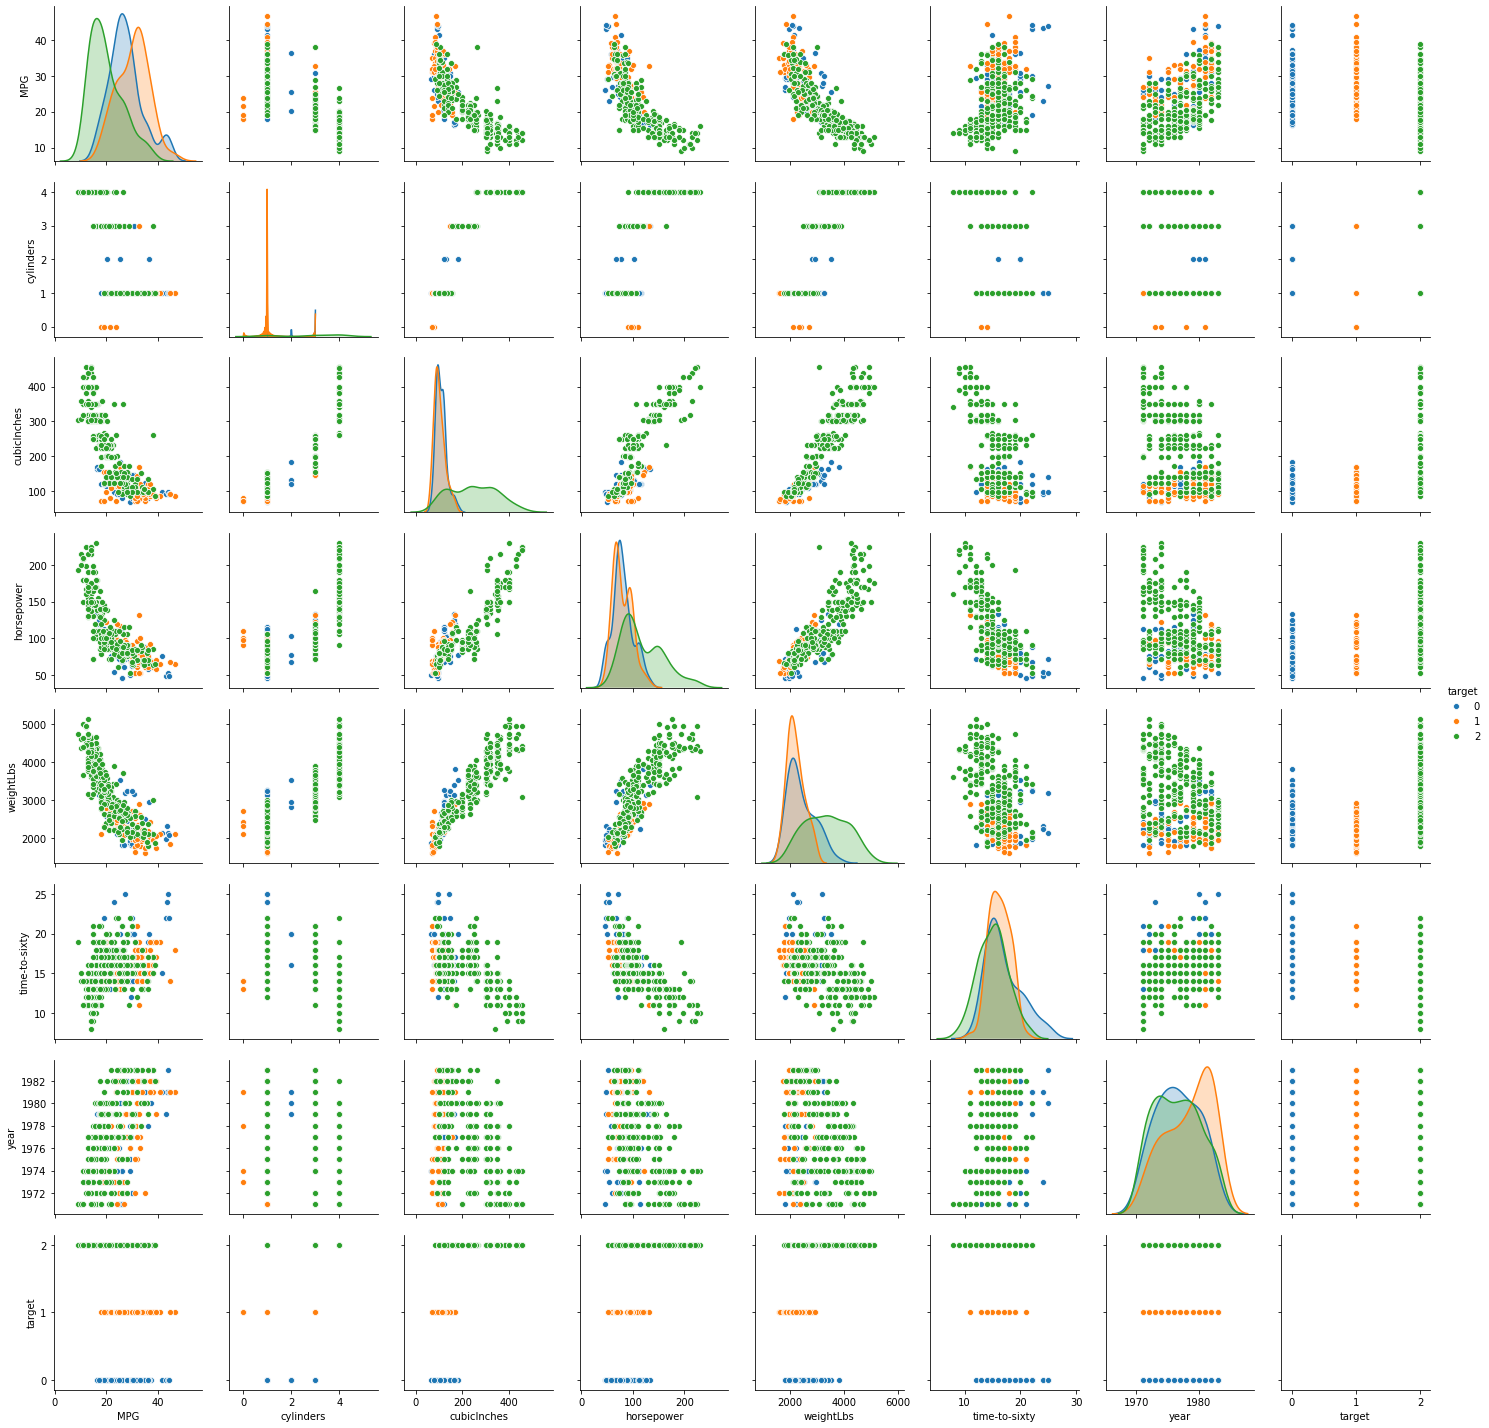

1
Ilość komponentów:  None
Zaartość nowej cechy:
[[-0.00759591  0.00137949  0.11433679  0.03896612  0.99264574 -0.00133913
  -0.0013369 ]]
[0.99753703]


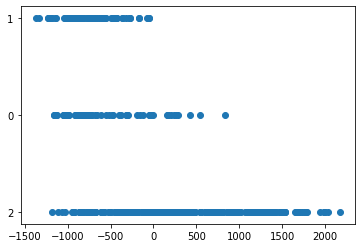

In [1]:
# Zadanie 1:
# Wyjaśnij w kilku zdaniach która cecha została wybrana przez PCA i dlaczego według Ciebie właśnie ta

# Poprzez analize dostarczonych danych (długość szerokość) najpewniej jest to powierzchnia płatka

# Zadanie bonus: przeprowadź dekompozycję PCA na wybranym przez siebie innym zbiorze danych -
# wykorzystamy poczęści lab4

from sklearn.datasets import fetch_openml
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
%matplotlib inline
from sklearn.decomposition import PCA
from sklearn import datasets

samochody = fetch_openml('cars1')
# cechy oraz etykiety
# Sprawdzamy które cechy są najwazniejsze ze wszystkich cech
X = samochody.data
y = samochody.target

# Inicjujemy

pca = PCA()
pca.fit(X)


# PCA tworzy nam nowe, fikcyjne cechy które próbują naśladować podstawowy zbiór
print("Ilośc komponentów: ", pca.n_components_)

# Zawartośc cech fikcyjnych
print("Zaartość nowych cech:")
print(pca.components_)

# sprawdzamy które cechy fikcyjne wpywają na zbiór
print(pca.explained_variance_ratio_)

# seaborn - wykresy
import seaborn as sns

# konwersja na obiekt pandas.DataFrame
samochody_df = pd.DataFrame(samochody['data'], columns=samochody['feature_names'])

# dodanie gatunku/typu do reszty dataframe
samochody_df['target'] = np.array(list(samochody['target']))

# wykres
sns.pairplot(samochody_df, hue='target')
plt.show()

# próba wskazania najistotniejszej cechy

pca_limit = PCA(n_components = 1)

X_new = pca_limit.fit_transform(X)
X_new[:5]
# Cechy:
print("Ilość komponentów: ", print(pca_limit.n_components_))

# Wpływ oryginalnych cech na wywnioskowaną cechę
print("Zaartość nowej cechy:")
print(pca_limit.components_)

# wynik parametru explained_variance_ratio_ w dalszym ciągu jest wysoki
print(pca_limit.explained_variance_ratio_)
plt.scatter(X_new, y)
plt.show()